In [25]:
import random
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt


In [26]:
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

n = 100
p = 0.05


# 2) Generowanie graf Erdos–Renyi

In [27]:
g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False)
g.vs["name"] = [f"v{i}" for i in range(n)]


# 3) Podsumowanie przed wagami

In [28]:
print("PODSUMOWANIE (przed ustawieniem wag)")
print(g.summary())
is_weighted_before = ("weight" in g.edge_attributes()) and (len(g.es["weight"]) > 0)
print("Czy graf jest ważony?", is_weighted_before)


PODSUMOWANIE (przed ustawieniem wag)
IGRAPH UN-- 100 251 -- 
+ attr: name (v)
Czy graf jest ważony? False


# 4) Wylistuj wszystkie wierzchołki i krawędzie

In [29]:
print("\nWierzchołki:")
print(g.vs["name"])  # wierzchołki
print("\nKrawędzie (indeksy):")
print([e.tuple for e in g.es])  # krawędzie (krotki indeksów wierzchołków)



Wierzchołki:
['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99']

Krawędzie (indeksy):
[(0, 3), (3, 7), (0, 9), (4, 13), (7, 17), (15, 20), (4, 21), (5, 21), (11, 21), (6, 22), (14, 23), (20, 23), (16, 24), (12, 25), (17, 25), (21, 25), (0, 26), (0, 27), (21, 27), (2, 28), (18, 28), (21, 28), (0, 29), (5, 29), (5, 30), (15, 30), (26, 30), (0, 31), (31, 32), 

# 5) Ustaw losowe wagi krawędzi

In [30]:
weights = list(np.random.uniform(0.01, 1.0, size=len(g.es)))
g.es["weight"] = weights

# 6) Podsumowanie po ustawieniu wag

In [31]:
print("\nPODSUMOWANIE (po ustawieniu wag)")
print(g.summary())
is_weighted_after = ("weight" in g.edge_attributes()) and (len(g.es["weight"])>0)
print("Czy graf jest ważony?", is_weighted_after)



PODSUMOWANIE (po ustawieniu wag)
IGRAPH UNW- 100 251 -- 
+ attr: name (v), weight (e)
Czy graf jest ważony? True


## pokaż pierwsze 30 krawędzi z wagami

In [32]:
print("\nPrzykładowe krawędzie z wagami (pierwsze 30):")
for i, e in enumerate(g.es[:30]):
    u, v = e.tuple
    print(i, g.vs[u]["name"], g.vs[v]["name"], f"weight={e['weight']:.4f}")



Przykładowe krawędzie z wagami (pierwsze 30):
0 v0 v3 weight=0.3808
1 v3 v7 weight=0.9512
2 v0 v9 weight=0.7347
3 v4 v13 weight=0.6027
4 v7 v17 weight=0.1645
5 v15 v20 weight=0.1644
6 v4 v21 weight=0.0675
7 v5 v21 weight=0.8675
8 v11 v21 weight=0.6051
9 v6 v22 weight=0.7110
10 v14 v23 weight=0.0304
11 v20 v23 weight=0.9702
12 v16 v24 weight=0.8341
13 v12 v25 weight=0.2202
14 v17 v25 weight=0.1900
15 v21 v25 weight=0.1916
16 v0 v26 weight=0.3112
17 v0 v27 weight=0.5295
18 v21 v27 weight=0.4376
19 v2 v28 weight=0.2983
20 v18 v28 weight=0.6157
21 v21 v28 weight=0.1481
22 v0 v29 weight=0.2992
23 v5 v29 weight=0.3727
24 v5 v30 weight=0.4615
25 v15 v30 weight=0.7873
26 v26 v30 weight=0.2077
27 v0 v31 weight=0.5191
28 v31 v32 weight=0.5965
29 v5 v34 weight=0.0560


# 7) Stopnie węzłów, tabela, histogram

In [33]:
degrees = g.degree()
deg_df = pd.DataFrame({
    "vertex_index": range(n),
    "vertex_name": g.vs["name"],
    "degree": degrees
})
print("\nStopnie wszystkich węzłów:")
print(deg_df.to_string(index=False))



Stopnie wszystkich węzłów:
 vertex_index vertex_name  degree
            0          v0       9
            1          v1       7
            2          v2       3
            3          v3       7
            4          v4       7
            5          v5       6
            6          v6       4
            7          v7       2
            8          v8       6
            9          v9       6
           10         v10       3
           11         v11       6
           12         v12       4
           13         v13       4
           14         v14       6
           15         v15       6
           16         v16       6
           17         v17       3
           18         v18       4
           19         v19       3
           20         v20       6
           21         v21      11
           22         v22       3
           23         v23       5
           24         v24       4
           25         v25       5
           26         v26       5
           27       

## Histogram stopni

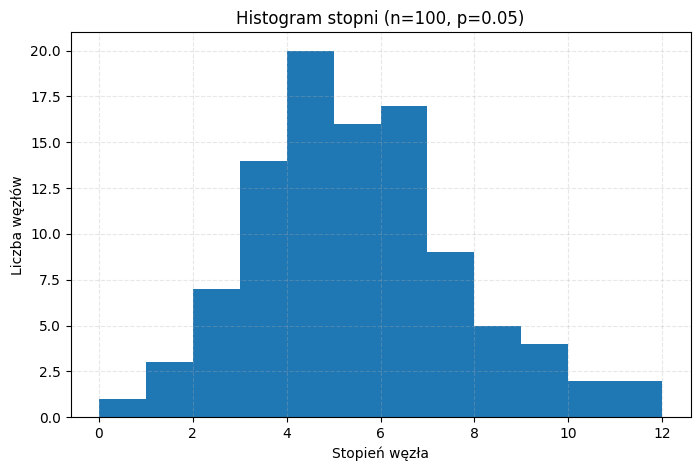

Histogram zapisano jako results/ex1_degree_histogram_igraph.png


In [34]:
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=range(min(degrees), max(degrees)+2))
plt.xlabel("Stopień węzła")
plt.ylabel("Liczba węzłów")
plt.title(f"Histogram stopni (n={n}, p={p})")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()
# plt.savefig("results/ex1_degree_histogram_igraph.png")
# plt.close()
print("Histogram zapisano jako results/ex1_degree_histogram_igraph.png")


# 8) Komponenty spójne

In [35]:
components = g.components()
print("\nLiczba komponentów spójnych:", len(components))
print("Rozmiary komponentów:", components.sizes())



Liczba komponentów spójnych: 2
Rozmiary komponentów: [99, 1]


# 9) PageRank i wizualizacja (rozmiar węzłów ~ PageRank)

In [36]:
pagerank_scores = g.pagerank(weights="weight")
pr_min, pr_max = min(pagerank_scores), max(pagerank_scores)
if pr_max - pr_min > 0:
    vertex_sizes = [8 + 37 * ((pr - pr_min) / (pr_max - pr_min)) for pr in pagerank_scores]
else:
    vertex_sizes = [12]*len(pagerank_scores)

g.vs["size"] = vertex_sizes
initial_pos = np.random.default_rng(random_seed).random((g.vcount(), 2))
layout = g.layout_fruchterman_reingold(seed=initial_pos)


visual_style = {
    "vertex_size": g.vs["size"],
    "vertex_label": None,
    "edge_width": [max(0.2, 2.5*w) for w in g.es["weight"]],
    "layout": layout,
    "bbox": (1200, 900),
    "margin": 50
}
ig.plot(g, "results/ex1_graph_pagerank_igraph.png", **visual_style)
print("Wizualizacja zapisana jako results/ex1_graph_pagerank_igraph.png")


Wizualizacja zapisana jako results/ex1_graph_pagerank_igraph.png
